<a href="https://colab.research.google.com/github/pranaykurwade/Servo-Prediction-Using-Linear-Regression/blob/main/Servo_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title of Project: Servo Prediction using Linear Regression

Import Liabraries

In [3]:
import numpy as np

In [1]:
import pandas as pd

Import Data

In [5]:
df = pd.read_csv("/content/Servo Mechanism.csv")

Describe Data

In [6]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [7]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


Data Preporcessing

In [9]:
df.shape

(167, 5)

In [10]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [13]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [14]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

In [16]:
df.replace({'Motor':{"A":0,"B":1,"C":2,"D":3,"E":4}},inplace=True)

In [17]:
df.replace({'Screw':{"A":0,"B":1,"C":2,"D":3,"E":4}},inplace=True)

Define Target Variable (y) and Feature Variables (X)

In [18]:
y = df['Class']

In [19]:
y.shape

(167,)

In [20]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [23]:
X = df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [24]:
X = df.drop('Class',axis=1)

In [25]:
X.shape

(167, 4)

In [26]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2529)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((125, 4), (42, 4), (125,), (42,))

Modelling

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

Model Prediction

In [34]:
y_pred = lr.predict(X_test)

In [35]:
y_pred.shape

(42,)

In [36]:
y_pred

array([25.56654851, 31.24940687, 19.04876502, 24.47852818, 39.37546387,
       24.37566459, 11.92192754, 19.94086363, 41.22109189, 41.9215261 ,
       13.76755557, 25.9225073 , 17.203137  , 15.50606268, 22.23125126,
       21.48770634, -4.92349976, 31.10343258, 32.9490606 ,  0.46057329,
       34.2402287 , 32.24862639, 34.53901401, 30.10421306, 18.94164411,
        7.03978758, 29.21211445, 16.9500418 , 24.77731349,  4.04896574,
       31.05774247, 23.93090499, 35.93988243, 31.94984108, 11.81480663,
        3.60420614, 22.63290015, 33.09503489, 16.65125649, 38.23027006,
       28.55737035, 21.78649166])

Model Evaluation

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
mean_squared_error(y_test, y_pred)

60.211561593192876

In [39]:
mean_absolute_error(y_test, y_pred)

6.735955685746795

In [40]:
r2_score(y_test, y_pred)

0.706476624263817

Data Visualization

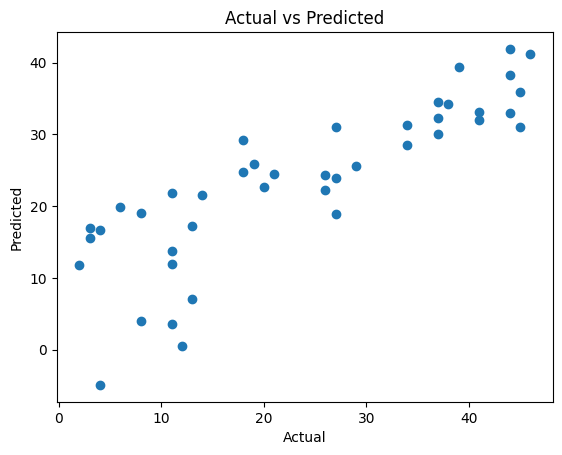

In [44]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

Future Prediction

In [46]:
X_new = df.sample(1)

In [47]:
X_new

,Motor,Screw,Pgain,Vgain,Class
64,3,0,4,3,18


In [48]:
X_new = X_new.drop('Class', axis=1)

In [49]:
X_new

,Motor,Screw,Pgain,Vgain
64,3,0,4,3


In [50]:
X_new.shape

(1, 4)

In [52]:
y_pred_new = lr.predict(X_new)

In [53]:
y_pred_new

array([29.21211445])